# Wind 

NOTE:  It is recommended that you execute all the cells in the notebook before you begin working with it.  To do this, select *cell => Run All* above. 

Study the notebook and work through the interactive examples.  There are **QUESTIONS** to ponder and optional   **INTERACTIVE EXERCISES** to work through that require small code modifications.  If you choose to do these exercises, follow these steps:

* Make the code modifications
* Highlight the cell (may already by highlighted)
* Select Run in the menu above to execute the cell with the modified code  

In this notebook we will focus on wind-driven surface gravity waves in the ocean.  In the first part we will review basic wave nomenclature and definitions.  We will then go over Airy's analytical solution to the problem of surface gravity wave propagation which allows us to compute the velocity, pressure field, and celerity associated with surface gravity waves.    


### Limiting factors for wave height

As the wind blows across the water, energy is continuously transferred from the wind to the waves.  The waves grow in length and height but this process does not continue unbounded.  The waves begin to dissipate energy through breaking and eventually the energy input will equal the dissipation.  The wave state is considered *fully mature*.  It is possible to predict the height of mature waves in deep water for a given wind speed but there are two key limiting factors which can inhibit the ability the waves to become fully mature.  The first is *duration*.  If the wind blows at 20 kts for only a short duration, for example an hour or two, this is not sufficient time for the waves to grow to the fully mature state.  The second factor is the lateral extent of the water, or *fetch*.  Consider steady wind blowing off the land for a very long time.  You kayak away from shore.  At first the waves are just ripples but the further you get from shore the larger they are.  This is an affect of fetch.  Embayments that have limited distance in the along-wind direction are considered *protected* as even strong winds are not able to build large waves due to the fetch limitations.  

The diagram below plots the significant wave height ($Hs$) of mature waves for a given wave speed subject to fetch and duration limitations.  You can also determine the dominant period $T$ of the waves.  To interpret the diagram, it is best to consider that the wave heights for a fully developed sea are contained along the y-axis.  For example, for a wind speed of 20 m/s $Hs$ is approximately 13 m and for a wind speed of 10 m/s $Hs$ is approximately 2.5 m.  You will also note that all the curves converge into the lower right half of the diagram where the waves are very small and high frequency (large $f$, small $T$).  This represents a state that is highly limited by fetch or duration.  As you move from that lower right hand corner, you are extending the the duration & the fetch.  To determine the sea state for a given wind speed, duration of the wind, and fetch, start from the lower right and move along the curve for that wind speed until you run into either your wind duration or your fetch and then stop.  Note the significant wave height and period.  


**Q1**:  The wind is blowing at 20 m/s.  Which is more likely to have a limiting affect on the wave height: A wind duration of 30h or a fetch of 1000 km?  

**Q2**:  Is the affect of wind speed on wave height linear?  

![WindWaves](figures/fetch_duration_limitation.jpg)

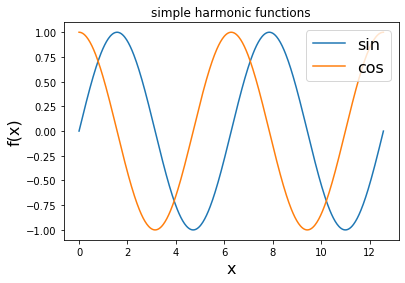

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# plot sin and cos
x  = np.linspace(0, 4*np.pi, num=500)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.title("simple harmonic functions")
plt.xlabel("x",fontsize=16)
plt.ylabel("f(x)",fontsize=16)
plt.legend(['sin','cos'],fontsize=16)
plt.show()



### Amplitude

The harmonic function $\sin(x)$ has the appearance of a wave but is very constraining as we would only be able to use it to model waves that range from -1 to 1 with a period of exactly $2\pi$.  We need to modify the function further so that it could be used to describe the broad spectrum of ocean waves.  We will do that by adding an additional variable, the *amplitude* of a wave, often written as $a$.  The amplitude is the maximum deviation of the wave from the mean value of the wave (here 0).  The amplitude of $\sin(x)$ is exactly 1 (or *unity*).  Scientists studying waves from a wide variety of displines refer to this metric of wave *size* using the amplitude and we will see why it is a natural measure in a minute.  However, there is an exception to this and that exception is oceanography.  Oceanographers may occasionally use *amplitude* but it is more common to use the wave *height*.  The *height* of the wave, often designated $H$ or $h$ is the distance from the trough to the crest.  For these simple, symmetric waves, this is exactly twice the amplitude.  For a wave of height $\zeta(x)=\cos(x)$, the wave height $H=2$.  

To be able to model waves of any given amplitude (or height), we can modify the harmonic function as follows:

$\zeta(x) = a\sin(x) = \frac{H}{2}\sin(x)$.  

In the next code block, two functions are defined.  One is the simple harmonic $\zeta(x) = \sin(x)$ and the other is $\zeta(x) = A\sin(x)$.  An interactive slider allows you to adjust the amplitude to see what effect it has on the function.  


**INTERACTIVE EXERCISE**:: What would happen to the function if a negative value were used for the amplitude?  If you are interested in testing your answer, change the first value of the triplet A=(0,4,0.1) to A=(-1,4,0.1) in the interact function in the code block below, then hit Run above.  This will change the starting value of the slider to -1.

In [8]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(A=(0,4,.1))
def ampdemo(A):
    t  = np.linspace(0, 4*np.pi, num=500)
    y  = np.sin(t)
    y2 = A*np.sin(t)
    plt.plot(t,y,'b')
    plt.plot(t,y2,'r')
    plt.xlabel("x",fontsize=16)
    plt.ylabel("$\zeta(x)$",fontsize=16)
    plt.legend(['$\sin(x)$','$A\sin(x)$'])
    plt.show()


interactive(children=(FloatSlider(value=2.0, description='A', max=4.0), Output()), _dom_classes=('widget-inter…

### A spatial perspective:  Wavelength

The ocean surface is not usually flat and calm and is normally subject to variation.  We can think of the variations with two perspectives:  varying in time and varying in space.  If we measure the height of the ocean surface at a point, say with yardstick mounted on pier and record the height on the yardstick at regular time intervals, we are looking at the variations in time at a fixed location.   Conversely we can take a photograph of the ocean wavefield.  In this case we would be looking at variations in space at fixed time.  For general spatial variations we would need to consider two spatial variables.  Typically these spatial variables are directions that are orthogonal or at right angles to each other (although this is not necessary).  These variables might be (*longitude*,*latitude*) or a local coordinate system in meters ($x$,$y$) which could be projections from the earth coordinates and aligned with them such that $x$ faces east and $y$ faces north or perhaps some other coordinate system of convenience.  For example, scientists working on nearshore or shelf processes often use a rotated (*alongshore*,*cross-shore*) coordinate system.  For the purposes of the discussion below we will consider only 1-spatial coordinate, assumed to be aligned with the direction of wave travel we will call that coordinate $x$.  The natural spatial measure of a wave is the distance from one *crest* (the highest point of the wave) to the next.  This is known as the *wavelength*.  You may see $\lambda$ or $L$ used to define the wavelength and in some cases, usually older texts, you may see $\Lambda$.  The wavelength has a spatial dimension and the unit used in oceanography is usually meters ($m$).   To use our harmonic functions to represent the spatial viewpoint of the wave we need to figure out how to change the model so that the function goes through one cycle every increment ($\delta x = \lambda$) rather than in increments of ($\delta x = 2 \pi$).  Thus we need to modify the argument of the function as follows:

$\zeta(x) = \sin(\frac{2\pi x}{\lambda})$

Thus, as $x$ proceeds through one $\lambda$, the argument (the *stuff* inside the parentheses that the function operates on) proceeds through $2 \pi$ and thus the function proceeds through one cycle. You can explore this in the code cell below where the slider allows you to select the wavelength of the wave. The value you set for wavelength will be the crest to crest distance. 

Often you will find an alternate representation of the spatial characteristics, one which uses the variable $\k$. It will look like this:

$\zeta(x) = \sin(kx)$

You can see right away that this is much cleaner.  If the two functions above are equivalent, we can see that $k=\frac{2\pi}{\lambda}$.  This variable, $k$, is called the *wavenumber*.  It is less intuitive but easy to work with mathematically.  Fortunately, it is easy to convert between them. 


In [9]:
@interact(wavelength=(0.5,10,.25))
def lambdademo(wavelength):
    t  = np.linspace(0, 8*np.pi, num=1000)
    y = np.sin(t*2*np.pi/wavelength)
    plt.plot(t,y,'b')
    plt.xlabel("x",fontsize=16)
    plt.ylabel("$\zeta(x)$",fontsize=16)
    plt.legend(['sin(2$\pi$x/$\lambda$)'],fontsize=16)
    ss = 'k = '+"{:.2f}".format(1/wavelength)+' rad/m'
    plt.text(0,1.3, ss, fontsize=12)
    plt.ylim((-1.5,1.5))
    plt.show()

interactive(children=(FloatSlider(value=5.25, description='wavelength', max=10.0, min=0.5, step=0.25), Output(…

### A temporal perspective:  Period

For the temporal perspective, the approach is similar to that of the spatial.  We return to the idea that we are measuring the height of the water surface at a fixed location, such as our example of a yardstick mounted on a pier.  In this case we are considering the temporal characteristics and the key variable for this is the *period*, defined as the time interval between successive wave crests.   The period is usually denoted $T$. $T$ has dimensions of time.  When talking about wind-generated waves, $T$ is usually expressed in seconds ($s$).  When talking about tides, it is sometimes expressed in $s$ and sometimes in hours.   Analogously to our spatial approach above we can modify the basic harmonic function so that it passes through one cycle when time $t$ goes through one period as follows:

$\zeta(t) = \sin\left(\frac{2 \pi t}{T}\right)$

There are other ways to express the time-varying characteristics.  The most intuitive alternate approach is the frequency $f$ which is simply the inverse of the period $f = 1/T$ and thus has units of 1 over time.  For wind-waves the units used are typically $\frac{1}{s}$ which is known as a Hertz ($Hz$).   A wave with a period of 10 $s$ has a frequency of $f=0.1$ Hz.  We can also think of $f$ as the number of waves passing each second.  The mathematical models of waves do not typically use $f$ but modifying our expression above it would be:

$\zeta(t) = \sin\left(2 \pi f t\right)$


A third variable that is used to describe the temporal characteristics is the *angular frequency* $\omega$.  As $2\pi$ radians is a full cycle, this is a measure of the a rate of cycling in radians per second $\omega = \frac{2\pi}{T}$.  The variable has dimensions of radians per time.  It is very common to see $\omega$ in the mathematical models of waves and in this case, it would be:

$\zeta(t) = \sin\left(\omega t\right)$

It is easy to see that it is the cleanest approach of the three. However, it is usually considered the least intuitive and thus you should be comfortable converting between the three.  In the code block below you can use the interactive slider to change the period of a wave.  

In [10]:
@interact(T=(0.5,10,.25))
def lambdademo(T):
    t  = np.linspace(0, 8*np.pi, num=1000)
    y = np.sin(t*2*np.pi/T)
    plt.plot(t,y,'b')
    plt.xlabel("t", fontsize=16)
    plt.ylabel("$\zeta(t)$", fontsize=16)
    plt.legend(['sin(2$\pi$t/T)'],fontsize=16)
    ss = 'f = '+"{:.2f}".format(1/T)+' Hz'
    ss2 = '$\omega$ = '+"{:.2f}".format(2*np.pi/T)+' rad/s'
    plt.text(0,1.3, ss, fontsize=12)
    plt.text(0,1.1, ss2, fontsize=12)
    plt.ylim((-1.5,1.5))
    plt.show()

interactive(children=(FloatSlider(value=5.25, description='T', max=10.0, min=0.5, step=0.25), Output()), _dom_…

### General Waveform

We can put the two perspectives together to create a more general expression for a 1-dimensional wave.  

$\zeta(x,t) = A\sin(kx - \omega t)$

This expression is not completely general as it requires the free surface height at (x=0,t=0) to be $\zeta(x=0,t=0)=0$.  Thus the *phase* of the wave is fixed.  We can add an additional factor to account for the phase. 

$\zeta(x,t) = A\sin(kx - \omega t + \phi)$

The phase does not affect the amplitude, period, or wavelength. It is easiest to think about it as affecting *when* something will happen.  For example, if two embayments had the exact same tidal characteristics except that one area had high tide occurring an hour before the other, the only difference between the waveforms would be the phase.  This will be discussed in more detail in the course unit on tides.  

In the code block below a general wave is devised and plotted with controls for advancing time and playing with the phase. You will note that the period ($T$) is set to 5 s, the wavelength is set to 30 m, and the wave height H is 1.3 m. Try setting time to zero and moving the phase to see how it influences the waveform at t=0.  Please note that the phase slider value is in degrees.  However, the argument to the sin function in any programming language must be in radians so you will see in the code below that this is converted to radians by multiplying the angle in degrees by $\frac{\pi}{180}$. 

 
**QUESTION**: Set the phase to zero and advance the time slider.  How much time (in seconds) does it take for the wave to advance by exactly one wavelength? Is this equal to the period $T$

The wavespeed can be deduced from the interactive plot.  The peak travels a distance $\lambda$ in time $T$ and moves a constant speed.  This speed is thus $c = \frac{\lambda}{T}$.  This is known as the wave *celerity*.  Given $\lambda$ and $T$ you can deduce the celerity.  It can also be written in terms of $\omega$ and $k$ (and you will more often see it presented in this manner)

$c = \frac{\lambda}{T} = \frac{ \frac{2}{\pi}{k}}{\frac{2}{\pi}{\omega}} = \frac{\omega}{k}$



In [11]:
@interact(t=(0,40,0.5),phi=(0,360,15))
def general(t,phi):
    T = 5
    wavelength = 30
    H = 1.3
    x  = np.linspace(0, wavelength*3, num=1000)
    z = H*np.sin(x*2*np.pi/wavelength - t*2*np.pi/T + phi*np.pi/180)
    zinit = H*np.sin(x*2*np.pi/wavelength)
    plt.plot(x,zinit,'r',label='wave at t=0 with $\phi=0$')
    plt.plot(x,z,'b',label='$\sin(kx-\omega t + \phi)$')
    plt.xlabel("t", fontsize=16)
    plt.ylabel("$\zeta(x,t)$", fontsize=16)
    #plt.legend(['wave at t=0','$\sin(kx-\omega t + \phi)$'],fontsize=16)
    plt.legend(loc=2,fontsize=14)
    plt.ylim((-1.8,1.8))
    plt.show()

interactive(children=(FloatSlider(value=20.0, description='t', max=40.0, step=0.5), IntSlider(value=180, descr…

### More complex waveforms

There are some caveats that are associated with these mathematical models of waves.  The first is that they assume a wave can be modeled using a single pure harmonic. This is reasonable for waves when the wavelength is small compared to the depth of the water (*deep water* or *short* waves) and the amplitude of the wave is small compared to the wavelength (*small amplitude* or *linear* waves) is but is not reasonable for waves as they enter shallow water.  We will explore those limits in detail in a subsequent notebook.   

Consider for example the waves shown in the image below which shows waves which are approaching the beach, feeling the bottom and are starting to steepen into waves which cannot be represented by sinusoids.  They are better characterized by long troughs (lighter sections) separated by relatively steep and narrow peaks (darker sections).  There are other mathematical representations of such waves, one of which is called a *cnoidal* function.  You can read about these waves and see some beautiful images of real waves with cnoidal characteristics on the [cnoidal wiki page](https://en.wikipedia.org/wiki/Cnoidal_wave). 

![Waves](figures/Periodic_waves_in_shallow_water.jpg)

At the beach, waves can steepen and topple over in a plunging breaker.  Clearly, it would be unreasonable to represent such waveforms using our sine function.

![Waves](figures/Large_breaking_wave.jpg)

### Waves are Rarely Solitary

The second caveat is that the realistic ocean is full of waves of varying characteristics.  These waves can interact in various waves to produce more complex wavefields.  We will examine in another notebook how the semi-diurnal (twice a day) tide wave generated by the moon-earth relationship interacts with the diurnal tide wave generated by the sun-earth relationship to produce the well known spring-neap cycle of tide heights.  In this case, two waves of different periods (approximately 12.42 hours and 24 hours) combine to produce a response that varies over a much larger period (two weeks).  

With regard to wind-generated waves, the ocean surface can be incredibly complex with waves of a wide *spectrum* of characteristics, including direction of travel passing through space.  Such wavefields are most often treated using a statistical approach which is a way of characterizing a complex wave state in a useful manner with only a handful of key variables.  The most prevalent wave statistic is the *significant wave height* ($H_{s}$).  While the strict definition of $H_{s}$ is quite complex, it can be approximated by the basic rule of thumb that $H_{s}$ is the average wave height of the highest third of all the waves.  It is not the absolute largest wave at any time.  Rather it is a measure of the characteristic *size* of the waves at a given time, one which is of use to both mariners and oceanographers.  Since energy scales as the square of wave height ($H^2$), $H_{s}$ represents the size of waves comprising the bulk of energy. 



![Waves](figures/Wave_buoy_Cook_Inlet_2011_low_res-1024x627.jpg) 

### Measuring Waves (Optional)

The purpose of the wave buoy shown above in Cook Inlet, AK is to make measurements of the wave field and relay them to a shore station.  Since this is a point measurement with fixed location, the vertical position of the device (assumed to mark the position of the free surface) might be considered to follow a sinusoid of the variety

$\zeta(t) = A \sin (\omega t)$

Given an observed time series $\zeta(t)$ one might be able to determine several characteristics. Based on the time between peaks, $T$ could be deduced and based on the vertical excursions, one might determine $A$. The difficulty lies in measuring $\zeta(t)$.  This must be made relative to some fixed location, for example the seafloor. For a buoy, this turns out to be quite challenging in a noise, turbid environment and thus most buoys rely on a separate, indirect measure: the *acceleration* of the wave buoy.  From this acceleration $a(t)$, the vertical position $\zeta(t)$ can be deduced (approximately).  To understand this, we work in the opposite direction.

The velocity is the instantaneous time rate of change of the position of an object.  In general, the position of an object is described with a vector and thus the velocity is also a vector.  However, for this simple example, let's assume the buoy only moves in one dimension, in the vertical.   The vertical velocity $v(t)$ is the time rate of change of the position $\zeta(t)$. 

$v(t) = \frac{d}{dt}\zeta(t) = A \omega \cos (\omega t)$

Here we used the chain rule to take the derivative of our $\sin$ function.

$\frac{d}{dt} \sin (u(t)) = \frac{du}{dt} \cos (u(t))$

with $u(t) = \omega t$ and $\frac{du}{dt} = \omega$.  The acceleration is the instantaneous rate of change of the velocity, or derivative of velocity with respect to time.  This would make the acceleration the second derivative of the position with respect to time. 

$a(t) = \frac{d^2}{dt^2}\zeta(t) = \frac{d}{dt}v(t) = -\omega^2 A \sin (\omega t)$

Let's look at these functions alltogether

\begin{eqnarray}
\zeta(t) & = & A \sin(\omega t)\\
v(t) & = & A \omega \cos (\omega t)\\
a(t) & = & -\omega^2 A \sin (\omega t)
\end{eqnarray}

We can see that the velocity ($v(t)$) and the position ($\zeta(t)$) are 90 degrees out of phase and that the amplitude of the velocity includes an additional factor of $\omega$ compared with position.  Note, this will also satisfy our units as the amplitude of velocity, $A \omega$ has units of m/s.  The acceleration ($a(t)$) is 180 degrees out of phase from the position (note the minus sign) and the amplitude includes two factors of $\omega$ relative to the amplitude of the position.  This also satisfies our dimensions as the amplitude of acceleration is $A \omega^2$ which has units of $m/s^2$.  Importantly, the argument of the harmonic function *does not change* when we take the derivative.  Thus, position/velocity/acceleration all oscillate with identical period. 

Let's assume that the angular frequency of the wave $\omega=1$ for the moment and examine only the phase differences. The resulting functions are plotted in the figure below.   Trace the line of the buoy position as a function of time.  The maximum magnitude of the velocity is reached when the buoy crosses the mean free surface ($\zeta=0$) and the magnitude of the vertical velocity is zero when the buoy is at peak or trough of a wave.  The magnitude of the acceleration is maximum when the buoy is at the peak or trough and is minimum when the buoy is at $\zeta=0$.  

An accelerometer on the buoy can attempt to measure $a(t)$, the black curve and from there the position time series $\zeta(t)$ can be deduced.  In reality, what is needed from the buoy is some measure of a typical period $T$ associated with the larger waves and the significant wave height $H_{sig}$ discussed above.  There are statistical methods to derive this directly from the measured acceleration.  



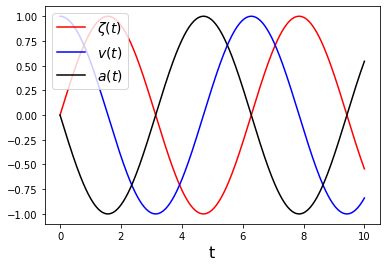

In [12]:
# plot position, velocity, and acceleration
omega = 1
A = 1
T = 5

t  = np.linspace(0, 10, num=1000)
z = A*np.sin(omega*t)
v = A*omega*np.cos(omega*t)
a = -A*omega*omega*np.sin(omega*t)
plt.plot(t,z,'r',label='$\zeta(t)$')
plt.plot(t,v,'b',label='$v(t)$')
plt.plot(t,a,'k',label='$a(t)$')
plt.xlabel("t", fontsize=16)
plt.legend(loc=2,fontsize=14)
plt.show()

Buoys can only provide point measurements.   Satellites can also be used to measure the wave state.  A [recent paper in Nature](https://www.google.com) recent paper in Nature that received much press focused on a multi-decade analysis of satellite-derived wave data that was benchmarked using observations and essentially concluded waves were getting larger. 

### Solutions

**A1** According to the diagram, a duration of 30h would be the limiting factor.  To see this, start at the right side of the diagram where all the lines converge.  Here, you have 0 duration and 0 fetch.  As you allow the fetch & duration to increase at a given wind speed, you move along that wind speed curve and the $Hs$ increases.  You cross the 30h duration before you cross the 1000 km fetch line.  This means that the 30h duration is limiting.

**A2**:  The relationship between wind speed and wave height is not linear.  As the wind speed is doubled, the wave height more than doubles.  Why would this be?  The answer is quite complex but it is maybe most important to remember that the stress of the wind on the water and therefore the force applied to a given patch of water is proportional to the square of the wind speed.   